In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
data_path = "./data/"
boston = pd.read_csv(data_path + "Boston.csv")

Boston데이터셋은 Boston 교외 506개 지역에 대한 median 주택가격(medv)과 이와 관련된 13개의 변수가 기록되어 있다.
 주택당 평균 방의 개수(rm), 평균 주택 연령(age), 사회 경제적 지위가 낮은 가정의 백분율(lstat)과 같은 13개의 변수를 사용하여 medv를 예측하려고 한다.

| Name    | Description                                                              |
|:---------|:--------------------------------------------------------------------------|
| crim    | per capita crime rate by town.                                           |
| zn      | proportion of residential land zoned for lots over 25,000   sq.ft.       |
| indus   | proportion of non-retail business acres per town.                        |
| chas    | Charles River dummy variable (= 1 if tract bounds river; 0   otherwise). |
| nox     | nitrogen oxides concentration (parts per 10 million).                    |
| rm      | average number of rooms per dwelling.                                    |
| age     | proportion of owner-occupied units built prior to 1940.                  |
| dis     | weighted mean of distances to five Boston employment centres.            |
| rad     | index of accessibility to radial highways.                               |
| tax     | full-value property-tax rate per \$10,000.                               |
| ptratio | pupil-teacher ratio by town.                                             |
| black   | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks   by town.        |
| lstat   | lower status of the population (percent).                                |
| medv    | median value of owner-occupied homes in \$1000s.                         |



In [5]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


1. 13개의 설명변수를 모두 사용하여 medev를 설명하는 회귀모형을 적합하고 각 설명변수의 VIF 값을 계산하시오.

In [10]:
formula = "medv~"+"+".join(boston.columns[:-1])
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [11]:
model_full = smf.ols(formula, data = boston).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          6.72e-135
Time:                        20:33:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
import patsy
y, X = patsy.dmatrices(formula, boston, return_type='matrix')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 585.2652379423121
VIF of crim : 1.7921915474332406
VIF of zn : 2.2987581787494418
VIF of indus : 3.9915964183460315
VIF of chas : 1.0739953275537886
VIF of nox : 4.393719847577495
VIF of rm : 1.933744435783257
VIF of age : 3.1008255128153372
VIF of dis : 3.9559449063727263
VIF of rad : 7.484496335274472
VIF of tax : 9.00855394759707
VIF of ptratio : 1.7990840492488984
VIF of black : 1.3485210764063753
VIF of lstat : 2.9414910780919366


2. All subset regression을 통해 변수선택을 하시오. AIC, BIC, adjusted R-square를 사용할 때 각 기준에 따라 최적의 모형이 달라지는가?

In [17]:
model = smf.ols(formula, data = boston)

In [18]:
X = model.data.orig_exog
y = model.data.orig_endog

In [20]:
# Best subset selection을 위한 코드
# Source: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html
# Modified by Yeojin Chung

import itertools
import time
import statsmodels.api as sm

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    X_model = X[list(('Intercept',)+feature_set)]
    model = sm.OLS(y, X_model)
    regr = model.fit()
    RSS = (regr.resid ** 2).sum()
    return {"model":regr, "RSS":RSS, "AIC": regr.aic,
            "BIC": regr.bic, "adj_r2": regr.rsquared_adj,
           "r2":regr.rsquared }

def getBest(k, best = "AIC"):

    tic = time.time()
    results = []

    for combo in itertools.combinations(X.columns[1:], k):
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    if best=="adj_r2" or best=="r2":
        best_model = models.loc[models[best].argmax()]
    else:
        best_model = models.loc[models[best].argmin()]

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [21]:
models_best = pd.DataFrame(columns=["model", "RSS","AIC","BIC","adj_r2", "r2"])

# BIC를 기준으로 best model찾기
for i in range(1,X.shape[1]):
    models_best.loc[i] = getBest(i, best = "BIC")

Processed 13 models on 1 predictors in 0.03775763511657715 seconds.
Processed 78 models on 2 predictors in 0.23758268356323242 seconds.
Processed 286 models on 3 predictors in 1.0512611865997314 seconds.
Processed 715 models on 4 predictors in 2.8221919536590576 seconds.
Processed 1287 models on 5 predictors in 4.699827671051025 seconds.
Processed 1716 models on 6 predictors in 6.72415566444397 seconds.
Processed 1716 models on 7 predictors in 6.588632106781006 seconds.
Processed 1287 models on 8 predictors in 4.775100946426392 seconds.
Processed 715 models on 9 predictors in 2.6862621307373047 seconds.
Processed 286 models on 10 predictors in 1.099320650100708 seconds.
Processed 78 models on 11 predictors in 0.3091621398925781 seconds.
Processed 13 models on 12 predictors in 0.05662822723388672 seconds.
Processed 1 models on 13 predictors in 0.00599980354309082 seconds.


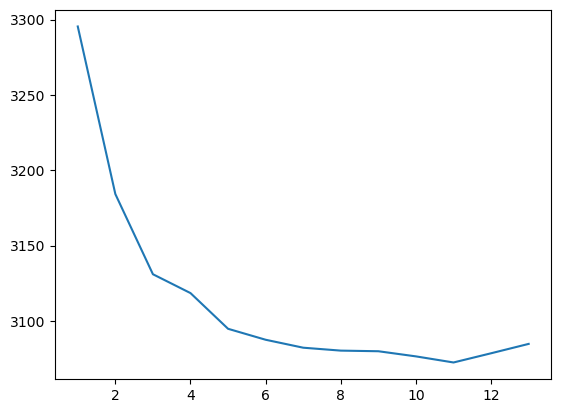

In [22]:
plt.plot(models_best['BIC'])
plt.show()

In [28]:
model_final = models_best.iloc[models_best['BIC'].astype('float64').argmin(),0]

In [29]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          5.54e-137
Time:                        08:22:19   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
models_best = pd.DataFrame(columns=["model", "RSS","AIC","BIC","adj_r2", "r2"])

for i in range(1,X.shape[1]):
    models_best.loc[i] = getBest(i, best = "adj_r2")

Processed 13 models on 1 predictors in 0.047005414962768555 seconds.
Processed 78 models on 2 predictors in 0.23699569702148438 seconds.
Processed 286 models on 3 predictors in 0.9758038520812988 seconds.
Processed 715 models on 4 predictors in 2.58975887298584 seconds.
Processed 1287 models on 5 predictors in 4.558795213699341 seconds.
Processed 1716 models on 6 predictors in 6.593437671661377 seconds.
Processed 1716 models on 7 predictors in 6.5315728187561035 seconds.
Processed 1287 models on 8 predictors in 4.362333536148071 seconds.
Processed 715 models on 9 predictors in 2.6595654487609863 seconds.
Processed 286 models on 10 predictors in 1.0290782451629639 seconds.
Processed 78 models on 11 predictors in 0.4348609447479248 seconds.
Processed 13 models on 12 predictors in 0.05417609214782715 seconds.
Processed 1 models on 13 predictors in 0.0061185359954833984 seconds.


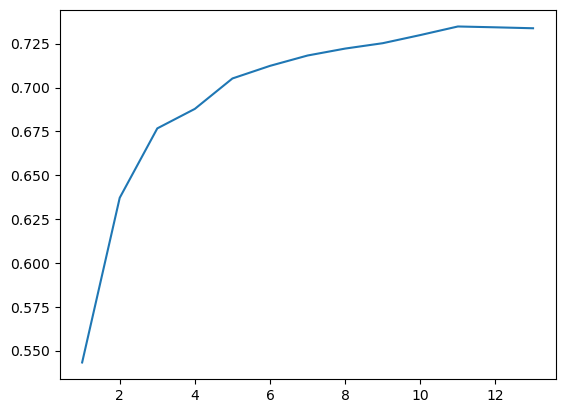

In [26]:
plt.plot(models_best['adj_r2'])
plt.show()

In [27]:
model_final2 = models_best.iloc[models_best['adj_r2'].astype('float64').argmax(),0]

In [28]:
model_final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          5.54e-137
Time:                        20:37:13   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3. 위의 2번에서 선택된 최적의 모형들 중 가장 변수의 개수가 적은 모형을 최종모형으로 선택하여 회귀적합 결과와 VIF값을 프린트 하시오. Full model에 비해 VIF 값이 어떻게 변화했는가?

In [29]:
model_final2.model.exog_names

['Intercept',
 'crim',
 'zn',
 'chas',
 'nox',
 'rm',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [30]:
X = model_final2.model.exog

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(model_final2.model.exog_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 579.2558454136407
VIF of crim : 1.7897041598301722
VIF of zn : 2.2392286709170564
VIF of chas : 1.0598192219819342
VIF of nox : 3.7780109907146673
VIF of rm : 1.8348063734957374
VIF of dis : 3.4434203360878866
VIF of rad : 6.861126314588104
VIF of tax : 7.272386358049807
VIF of ptratio : 1.757681496609674
VIF of black : 1.3415587496473569
VIF of lstat : 2.581984267903098
